## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset using pandas .merge() method
comb_pharm_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")


# Display the data table for preview
comb_pharm_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
mouse_count = comb_pharm_data_df["Mouse ID"].nunique()

# Build data frame to display count of unique mouse IDs
mouse_count_df = pd.DataFrame({"Total Mouse Subjects": [mouse_count]})

mouse_count_df

,Total Mouse Subjects
0,249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and TimepoinT
drop_dup_mouse_id = comb_pharm_data_df.loc[comb_pharm_data_df.duplicated(subset=['Mouse ID', 'Timepoint',]),'Mouse ID'].unique()


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
print(drop_dup_mouse_id)
## gives mouse id of duplicated data

['g989']


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = comb_pharm_data_df[comb_pharm_data_df['Mouse ID'].isin(drop_dup_mouse_id)==False]
clean_df.head(20)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [7]:
# Checking the number of mice in the clean DataFrame.
corrected_mouse_count = clean_df["Mouse ID"].nunique()
print(corrected_mouse_count)

# Build data frame to display count of unique mouse IDs
corrected_mouse_count_df = pd.DataFrame({"Actual Total Mouse Subjects": [corrected_mouse_count]})

corrected_mouse_count_df

248


,Actual Total Mouse Subjects
0,248


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the 
# ..following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

## First, prepare dataframe for Summary calculations

# sort by timepoint
time_sorted_df = clean_df.sort_values("Timepoint", ascending= True)

# reset index
new_sorted_df = time_sorted_df.reset_index(drop=True)

# delete unnecessary columns
tumor_df = new_sorted_df.drop('Metastatic Sites', axis=1).drop('Sex', axis=1).drop('Age_months', axis=1).drop('Weight (g)', axis=1)


# make the drug the index and pivot for readability, and place stats in values column
# Mean:
drug_groups_df =  tumor_df.pivot_table(tumor_df, index=['Drug Regimen','Timepoint'], aggfunc='mean')
drug_groups_df.rename(columns = {'Tumor Volume (mm3)': 'Avg Tumor Volume(mm3)'}, inplace=True)


# Median:
drug_groups_df["Median"] = tumor_df.pivot_table(tumor_df, index=['Drug Regimen','Timepoint'], aggfunc='median')

# Mode:
## drug_groups_df["Mode"] = drug_groups_df.groupby('Drug Regimen')['Avg Tumor Volume(mm3)'].mode()

# Variance:
drug_groups_df["Variance"] = tumor_df.pivot_table(tumor_df, index=['Drug Regimen','Timepoint'], aggfunc='var')

#SEM:
drug_groups_df["SEM"] = tumor_df.pivot_table(tumor_df, index=['Drug Regimen','Timepoint'], aggfunc='sem')

# Std. Dev:
drug_groups_df["Standard Deviation"] = tumor_df.pivot_table(tumor_df, index=['Drug Regimen','Timepoint'], aggfunc='std')

# Change in Volume:
drug_groups_df["Change in Tumor Vol.(mm3)"] = drug_groups_df.groupby('Drug Regimen')['Avg Tumor Volume(mm3)'].diff()
drug_groups_df.fillna(0, inplace=True)

# Displays the aggregates for each drug of interest and how they change over time
drug_groups_df

Avg Tumor Volume(mm3)     Median   Variance       SEM  \
Drug Regimen Timepoint                                                          
Capomulin    0                      45.000000  45.000000   0.000000  0.000000   
             5                      44.266086  45.597064   5.030889  0.448593   
             10                     43.084291  43.421014  12.344133  0.702684   
             15                     42.064317  42.798160  16.878693  0.838617   
             20                     40.716325  40.716428  19.035028  0.909731   
...                                       ...        ...        ...       ...   
Zoniferol    25                     55.432935  55.676604   5.808348  0.602513   
             30                     57.713531  57.419744   9.601024  0.800043   
             35                     60.089372  60.365832  10.876760  0.881426   
             40                     62.916692  62.274543  13.958456  0.998515   
             45                     65.960888  65.684689  14.100301  1.003576   

                        Standard Deviation  Change in Tumor Vol.(mm3)  
Drug Regimen Timepoint                                                 
Capomulin    0                    0.000000                   0.000000  
             5                    2.242964                  -0.733914  
             10                   3.513422                  -1.181796  
             15                   4.108369                  -1.019973  
             20                   4.362915                  -1.347992  
...                                    ...                        ...  
Zoniferol    25                   2.410052                   2.262601  
             30                   3.098552                   2.280596  
             35                   3.297993                   2.375841  
             40                   3.736102                   2.827320  
             45                   3.755037                   3.044196  

[100 rows x 6 columns]

In [9]:
# pivot table for different view/analysis of avg tumor size over timepints
tumor_vol_table = drug_groups_df.pivot_table('Avg Tumor Volume(mm3)', ['Timepoint'], 'Drug Regimen')
tumor_vol_table.head(10)

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [10]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_mean = clean_df.groupby(['Drug Regimen'])['Timepoint'].mean().map("{:.2f}".format)
drug_median = clean_df.groupby(['Drug Regimen'])['Timepoint'].median()
drug_var = clean_df.groupby(['Drug Regimen'])['Timepoint'].var(ddof = 0).map("{:.2f}".format)
drug_stdev = clean_df.groupby(['Drug Regimen'])['Timepoint'].std(ddof = 0).map("{:.2f}".format)
drug_sem = clean_df.groupby(['Drug Regimen'])['Timepoint'].sem().map("{:.2f}".format)

# Build Data Frame to Display Statistical Summary
drug_df = pd.DataFrame({"Mean": drug_mean, "Median": drug_median, "Variance": drug_var, "Std. Dev.": drug_stdev, "SEM": drug_sem})

## NEED TO DO:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

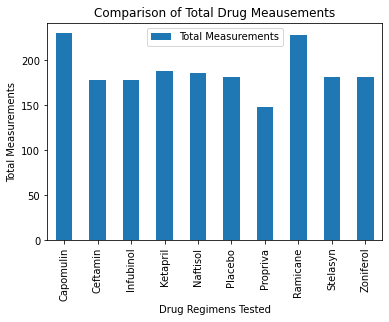

<Figure size 432x288 with 0 Axes>

In [11]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# Start by getting a value_counts of the Drug Regimen column
# Test different variables to choose best path for building pandas data frame
measurement_counts = clean_df['Drug Regimen'].value_counts()
measurements1 = clean_df.groupby(['Drug Regimen']).Sex.count()
##print(measurement_counts)
## print(measurements1)

# Build pandas data frame
measurement_counts_df = pd.DataFrame({"Total Measurements": measurements1})
measurement_counts_df

# Chart our data, give it a title, and label the axes
drug_chart = measurement_counts_df.plot(kind="bar", title="Comparison of Total Drug Meausements")
drug_chart.set_xlabel("Drug Regimens Tested")
drug_chart.set_ylabel("Total Measurements")

plt.show()
plt.tight_layout()

<BarContainer object of 10 artists>

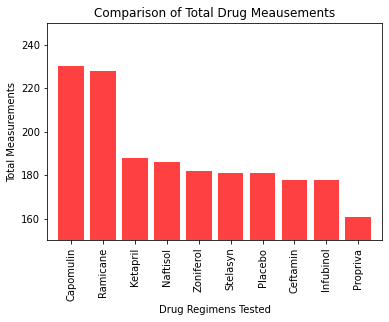

In [12]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
# Create lists to store keys and values
drugs = ['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol', 'Stelasyn', 'Placebo', 'Ceftamin', 'Infubinol', 'Propriva']
measurements = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]

# set x=-axis equal to the length of the drug list
x_axis = np.arange(0, len(drugs))

# make variable for the tick locations using list comprehension
tick_locations = [value for value in x_axis]

# place ticks on x-axis with the drugs at each tick
plt.xticks(tick_locations, drugs, rotation="vertical")

# Plot the title and axes labels
plt.title("Comparison of Total Drug Meausements")
plt.xlabel("Drug Regimens Tested")
plt.ylabel("Total Measurements")

# set the limits using the pyplot limits method
plt.xlim(-0.75, len(drugs)-0.25)
plt.ylim(150, 250)

# Finally, plot using .bar method from pyplot
plt.bar(x_axis, measurements, facecolor='red', alpha=0.75, align="center")

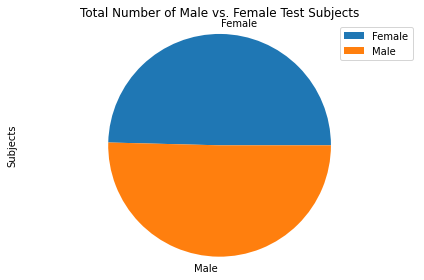

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
# Create Pie Chart using pandas .plot() method
sex_counts = clean_df.groupby(['Sex'])['Mouse ID'].nunique()
sex_counts_df = pd.DataFrame({"Subjects": sex_counts})
sex_counts_df
drug_pie = sex_counts_df.plot(kind='pie', y='Subjects', title="Total Number of Male vs. Female Test Subjects")

# Format and Show
plt.axis("equal")
plt.tight_layout()
plt.show()

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


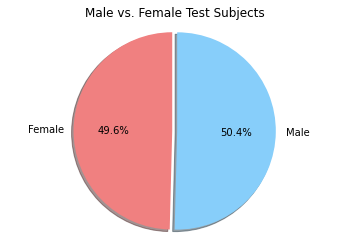

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# make variable to count the number of unique male mice subjects
sex_counts = clean_df.groupby(['Sex'])['Mouse ID'].nunique()
sexes = ['Female', 'Male']
print(sex_counts)

# Set axis, colors, and explode attributes
x_axis = np.arange(0, len(sex_counts))
colors = ["lightcoral", "lightskyblue"]
explode = (0, 0.05)


# Set title of the chart
plt.title("Male vs. Female Test Subjects")

# Use .pie() method to Create pie chart with above parameters as arguements
plt.pie(sex_counts, explode=explode, labels=sexes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)

# set an equal axis to prvent ellipsoidal mis-shaping
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [18]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Use .loc method to get the rows with the 4 drugs of interest
selected_reg_df = clean_df.loc[(clean_df['Drug Regimen'] == 'Capomulin') | (clean_df['Drug Regimen'] == 'Infubinol') |
                               (clean_df['Drug Regimen'] == 'Ramicane') | (clean_df['Drug Regimen'] == 'Ceftamin')]
selected_reg_df.reset_index(drop=True)
selected_reg_df

# Start by getting the last (greatest) timepoint for each mouse
final_selected_reg_df = selected_reg_df.loc[selected_reg_df['Timepoint'] == 45] 

# Set the index to the Mouse ID
final_selected_reg_df.set_index('Mouse ID', inplace=True)

# Drop Unecessary Columns
final_selected_reg_df = final_selected_reg_df.drop('Metastatic Sites', axis=1).drop('Sex', axis=1).drop('Age_months', axis=1).drop('Weight (g)', axis=1).drop('Timepoint', axis=1)

# Rename Values column to indicate final timepoint
final_selected_reg_df = final_selected_reg_df.rename(columns = {"Tumor Volume (mm3)": "Final Tumor Volume (mm3)"})

# Format for readability
final_selected_reg_df['Final Tumor Volume (mm3)'] = final_selected_reg_df['Final Tumor Volume (mm3)'].map("{:.2f}".format)

final_selected_reg_df

,Drug Regimen,Final Tumor Volume (mm3)
Mouse ID,,
k403,Ramicane,22.05
s185,Capomulin,23.34
x401,Capomulin,28.48
m601,Capomulin,28.43
g791,Ramicane,29.13
...,...,...
x822,Ceftamin,61.39
y163,Infubinol,67.69
y769,Ceftamin,68.59


In [19]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
times = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45]




# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment in clean_df['Drug Regimen']:
    if treatment == treatments:
        quartiles = final_selected_reg_df['Final Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])
        treatment_quartiles.append(quartiles)
        

print(treatment_quartiles)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

[]


In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

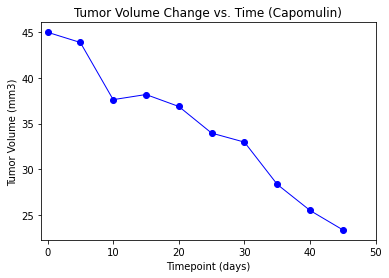

In [219]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
# create list for timepoints
x_axis = np.arange(0, 50, 5)
volumes = clean_df['Tumor Volume (mm3)'][10:20]

# Set the title and Axis Labels
plt.title("Tumor Volume Change vs. Time (Capomulin)")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

# Plot line graph
plt.plot(x_axis, volumes, marker ='o', color ="blue", linewidth=1)
plt.xlim(-1, 50)

plt.show()

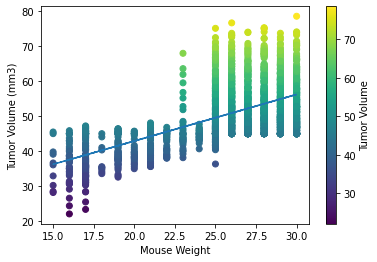

In [228]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(clean_df['Weight (g)'], clean_df['Tumor Volume (mm3)'], c=clean_df['Tumor Volume (mm3)'])
clb = plt.colorbar()
plt.xlabel("Mouse Weight")
plt.ylabel("Tumor Volume (mm3)")
clb.set_label("Tumor Volume")


# Add line from excercise below to this plot
weight = clean_df['Weight (g)']
volume = clean_df['Tumor Volume (mm3)']

# Derive a linear regression model
mw_slope, mw_int, mw_r, mw_p, mw_std_err = st.linregress(weight, volume)

# Create equation of line to display linear correlation between mouse weight and tumor volume
mw_fit = mw_slope * weight + mw_int
plt.plot(weight,mw_fit,"--")
plt.show()

## Correlation and Regression

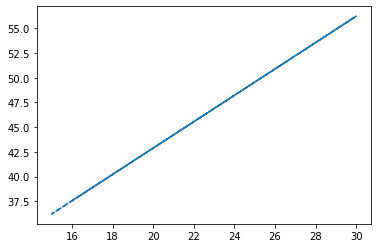

In [227]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# make variables for easy access to x and y values
weight = clean_df['Weight (g)']
volume = clean_df['Tumor Volume (mm3)']

# Derive a linear regression model
mw_slope, mw_int, mw_r, mw_p, mw_std_err = st.linregress(weight, volume)

# Create equation of line w/ variables above
mw_fit = mw_slope * weight + mw_int
plt.plot(weight,mw_fit,"--")

## Now add to plot above